In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns

sns.set_theme()

In [3]:
def volume_boxplot(volumes, labels, ax=None):
    if ax==None: ax=plt.gca()
    bp=ax.boxplot([np.concatenate(volumes[label]) for label in labels], labels=labels, showfliers=False, patch_artist=True, notch=True, vert=False)

    for patch, label in zip(bp['boxes'], labels):
        if label.startswith('SC'):
            color='C0'
        else:
            color='C2'
        patch.set_facecolor(color)


    ax.set_xlabel('Volume (μm$^3$)')

In [4]:
def cc_boxplot(volumes, labels, ax=None, WT_line=False, label_n=True, label_trials=True, cosmetic_labels=None):
    if not ax:
        ax=plt.gca()

    num_groups=len(labels)
    colors=['g','r','orange']
    
    all_bps=[]
    for i, label in enumerate(labels):
        if label_n:
            box_labels=[f'n={len(v)}' for v in volumes[label]]
        else:
            box_labels=['' for v in volumes[label]]

        bp=ax.boxplot(volumes[label], positions=np.arange(i*4, i*4+3), patch_artist=True, showfliers=False, labels=box_labels, notch=True)

        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
        all_bps.append(bp)
    
    if label_trials:
        ylim=ax.get_ylim()
        y_increment=0.1*(ylim[1]-ylim[0])
        ax.set_ylim(ylim[0], ylim[1]+y_increment)
        if not cosmetic_labels:
            cosmetic_labels=labels
        for i, label in enumerate(cosmetic_labels):
            ax.text(i*4+1, ylim[1], label, ha='center', va='bottom', weight='bold')
    
    if WT_line:
        WT_labels=[label for label in labels if 'WT' in label]
        if len(WT_labels)==0:
            print('No WT labels found in the list')
        else:
            median_values=[np.median(np.concatenate([volumes[label][i] for label in WT_labels])) for i in range(3)]
            for med_value, color in zip(median_values, ['green','red','orange']):
                ax.axhline(med_value, color=color, linestyle='--', alpha=0.7, zorder=0)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 50)
    ax.set_ylabel('Volume (μm$^3$)')

    return all_bps

In [83]:
def occupancy_barplot(volumes, labels, ax=None, xticks='n'):
    if not ax: ax=plt.gca()

    occupancies=[[len(v) for v in volumes[label]] for label in labels]
    total_occupancies=[np.sum(o) for o in occupancies]
    percent_occupancies=np.concatenate([np.array(o)/np.sum(o) for o in occupancies])

    bars=ax.bar(np.concatenate([np.arange(i*4, i*4+3) for i in range(len(labels))]), percent_occupancies)

    for bar in bars[0::3]: bar.set_color('g')
    for bar in bars[1::3]: bar.set_color('r')
    for bar in bars[2::3]: bar.set_color('orange')

    for bar in bars: bar.set_edgecolor('k')
    if xticks=='n':
        ax.set_xticks(np.arange(len(labels))*4+1, [f'n={o}' for o in total_occupancies])
    elif xticks=='cycle':
        ax.set_xticks(np.concatenate([np.arange(i*4, i*4+3) for i in range(len(labels))]), ['G1','S','G2']*len(labels))

# Wild Type

In [5]:
volume_folder='RAM_dump/volumes/'
files={'ME HR 0426':'20240426 ME Treatments/WT.pkl',
       'ME 0412':'20240412 ME.pkl',
       'ME 0415_1':'20240415 ME_1.pkl',
       'ME 0415_2':'20240415 ME_2.pkl',
       'ME adhered':'20240520 adhered_ME.pkl',
       'SC HR 0410':'20240410 Heather SC.pkl',
       'SC HR dil 0425':'20240425 SC treatments and ycomp bum dilutions/WT_dilution.pkl',
       'SC HR 0425':'20240425 SC treatments and ycomp bum dilutions/WT.pkl',
       'SC HR 0419':'20240419 SC treatments/WT.pkl',
       'SC 0407':'20240407 SC.pkl',
       'SC 0411':'20240411 SC.pkl'}

volumes={file:pd.read_pickle(volume_folder+files[file])[1:] for file in files}

In [6]:
for i in range(len(volumes['ME adhered'])):
    is_nan=np.isnan(volumes['ME adhered'][i])
    print(np.sum(is_nan))
    volumes['ME adhered'][i]=volumes['ME adhered'][i][~is_nan]

1
0
0


[array([[0.        , 0.39277201, 0.15816993, 1.        ],
        [0.        , 0.26666667, 0.10588235, 1.        ]]),
 array([[0.09019608, 0.39294118, 0.67058824, 1.        ],
        [0.03137255, 0.28973472, 0.57031911, 1.        ],
        [0.03137255, 0.18823529, 0.41960784, 1.        ]])]

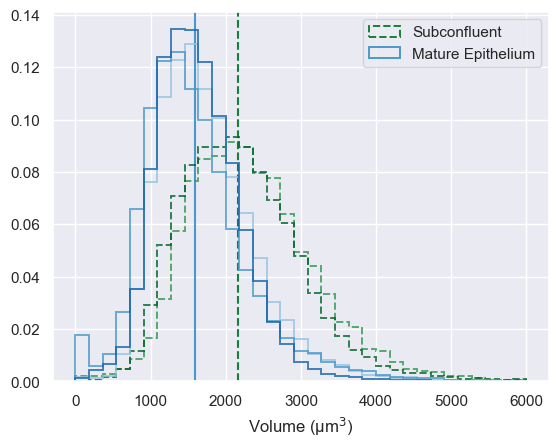

In [81]:
# Combine all volumes into a list
colors=np.concatenate([plt.cm.Greens([0.7,0.9]), plt.cm.Blues([0.4,0.6,0.8])])
for label, color in zip(['SC 0407', 'SC 0411', 'ME 0412', 'ME 0415_1', 'ME 0415_2'], colors):
    if label.startswith('SC'):
        linestyle='--'
    else:
        linestyle='-'
    values=np.concatenate(volumes[label])
    plt.hist(values, weights=np.ones(len(values))/len(values), bins=33, range=(0,6000), histtype='step', linestyle=linestyle, color=color, linewidth=1.4, alpha=0.8)

# fake legend: dashed vs. solid lines
plt.hist([], histtype='step', linestyle='--', color=plt.cm.Greens(0.8), linewidth=1.4, label='Subconfluent')
plt.hist([], histtype='step', linestyle='-', color=plt.cm.Blues(0.6), linewidth=1.4, label='Mature Epithelium')

plt.axvline(np.median(np.concatenate(volumes['SC 0407']+volumes['SC 0411'])), linestyle='--', color=plt.cm.Greens(0.8), alpha=1, zorder=1)
plt.axvline(np.median(np.concatenate(volumes['ME 0412']+volumes['ME 0415_1']+volumes['ME 0415_2'])), linestyle='-', color=plt.cm.Blues(0.6), alpha=1, zorder=1)

plt.legend(loc='upper right')
plt.xlabel('Volume (μm$^3$)')
#plt.title('Volume distribution of SC and ME cells, my data')

plt.savefig(r'C:\Users\Andy\OneDrive - The University of Chicago\UChicago\Gardel Lab\jupyter\plots\lab_meetings\24-6-21/volume_hist-suspended.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
for label in ['SC 0407', 'SC 0411', 'ME 0412', 'ME 0415_1', 'ME 0415_2']:
    values=np.concatenate(volumes[label])
    print(label, np.nanmedian(values))

SC 0407 2251.5379816952245
SC 0411 2133.98326185228
ME 0412 1656.0915222348829
ME 0415_1 1487.3413036636355
ME 0415_2 1587.8670870247909


In [14]:
SC_median=np.nanmedian(np.concatenate(volumes['SC 0407']+volumes['SC 0411']))
ME_median=np.nanmedian(np.concatenate(volumes['ME 0412']+volumes['ME 0415_1']+volumes['ME 0415_2']))

In [15]:
SC_median/ME_median

1.355620450628496

In [9]:
print('SC', np.nanmedian(np.concatenate(volumes['SC 0407']+volumes['SC 0411'])))
print('ME', np.nanmedian(np.concatenate(volumes['ME 0412']+volumes['ME 0415_1']+volumes['ME 0415_2'])))

SC 2160.2026692883824
ME 1593.515846037041


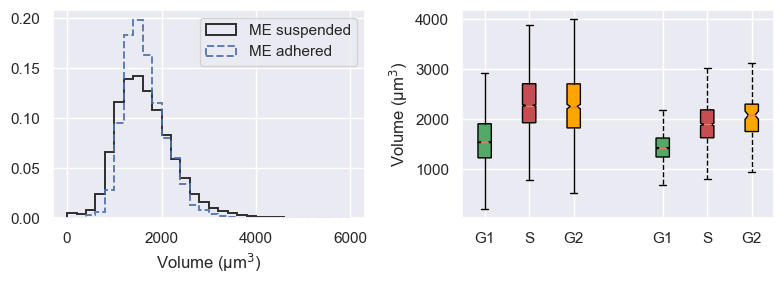

In [87]:
fig, axes=plt.subplots(1,2, figsize=(8,3))
suspended_values=np.concatenate(volumes['ME 0412']+volumes['ME 0415_1']+volumes['ME 0415_2'])
adhered_values=np.concatenate(volumes['ME adhered'])
axes[0].hist(suspended_values, bins=30, range=(0,6000), weights=np.ones_like(suspended_values)/len(suspended_values), histtype='step', linestyle='-', color='k', linewidth=1.4, alpha=0.9, label='ME suspended')
axes[0].hist(adhered_values, bins=30, range=(0,6000), weights=np.ones_like(adhered_values)/len(adhered_values), histtype='step', linestyle='--', color='C0', linewidth=1.4, alpha=0.9, label='ME adhered')
axes[0].legend(loc='upper right')
axes[0].set_xlabel('Volume (μm$^3$)')

bp=cc_boxplot(volumes, ['ME 0412', 'ME adhered'], ax=axes[1], label_n=False, label_trials=False)

plt.setp(bp[1]['whiskers'], linestyle='--')
#plt.setp(bp[1]['boxes'], edgecolor='k')
#for item in ['whiskers','caps']:
#        plt.setp(bp[1][item], color='navy')
        
axes[1].set_xticks([0,1,2,4,5,6], ['G1', 'S', 'G2', 'G1','S','G2'],rotation=0)
fig.tight_layout()

plt.savefig('plots/poster 6-3/suspended_vs_adhered.jpg', bbox_inches='tight', dpi=300)

In [113]:
help(plt.axvline)

Help on function axvline in module matplotlib.pyplot:

axvline(x: 'float' = 0, ymin: 'float' = 0, ymax: 'float' = 1, **kwargs) -> 'Line2D'
    Add a vertical line across the Axes.
    
    Parameters
    ----------
    x : float, default: 0
        x position in data coordinates of the vertical line.
    
    ymin : float, default: 0
        Should be between 0 and 1, 0 being the bottom of the plot, 1 the
        top of the plot.
    
    ymax : float, default: 1
        Should be between 0 and 1, 0 being the bottom of the plot, 1 the
        top of the plot.
    
    Returns
    -------
    `~matplotlib.lines.Line2D`
    
    Other Parameters
    ----------------
    **kwargs
        Valid keyword arguments are `.Line2D` properties, except for
        'transform':
    
        Properties:
        agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
        alpha: scala

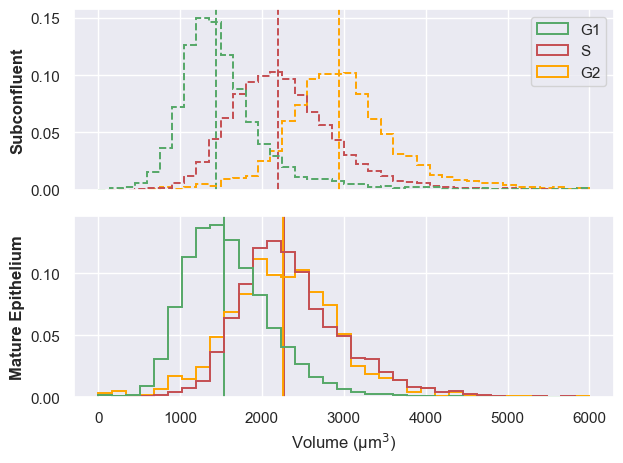

In [127]:
fig, axes=plt.subplots(2,1, sharex=True)
axes[0].set_ylabel('Subconfluent', weight='bold')
axes[1].set_ylabel('Mature Epithelium', weight='bold')
axes[1].set_xlabel('Volume (μm$^3$)')

axes[0].hist(volumes['SC 0411'], color=['g','r','orange'], linestyle='--', histtype='step', range=(0,6000), bins=40, weights=[np.ones_like(v)/len(v) for v in volumes['SC 0411']], linewidth=1.4)
axes[1].hist(volumes['ME 0412'], color=['g','r','orange'], histtype='step', range=(0,6000), bins=35, weights=[np.ones_like(v)/len(v) for v in volumes['ME 0412']], linewidth=1.4)

for v0, v1, c in zip(volumes['SC 0411'], volumes['ME 0412'], ['g','r','orange']):
    axes[0].axvline(np.nanmedian(v0), linestyle='--', zorder=1, color=c, alpha=1, linewidth=1.4)
    axes[1].axvline(np.nanmedian(v1), linestyle='-', zorder=1, color=c, alpha=1, linewidth=1.4)

# fake legend
axes[0].hist([], histtype='step', color='g', linewidth=1.4, label='G1')
axes[0].hist([], histtype='step', color='r', linewidth=1.4, label='S')
axes[0].hist([], histtype='step', color='orange', linewidth=1.4, label='G2')
axes[0].legend()

fig.tight_layout()
plt.savefig('plots/lab_meetings/24-6-21/volume_hist-SC_ME.jpg', bbox_inches='tight',dpi=300)

In [112]:
[np.median(v) for v in volumes['SC 0411']+volumes['ME 0412']]

[1442.2778511428605,
 2198.5776783217198,
 2943.1802824328197,
 1536.213446163747,
 2274.939358005996,
 2253.863910851415]

In [129]:
np.array([2274.939358005996,2253.863910851415])/1536.213446163747

array([1.48087453, 1.46715544])

(array([[0.00124948, 0.00101809, 0.00078671, 0.00152714, 0.00527558,
         0.01466981, 0.03225508, 0.05770744, 0.08112361, 0.09722801,
         0.10398445, 0.10310519, 0.09958813, 0.08302096, 0.07376556,
         0.06025267, 0.04396316, 0.03609607, 0.02748855, 0.01957518,
         0.01323523, 0.01031977, 0.00721921, 0.00541441, 0.00319311,
         0.00347078, 0.00166597, 0.00249896, 0.00134203, 0.00106437],
        [0.00181736, 0.00068151, 0.00045434, 0.00068151, 0.00454339,
         0.00613358, 0.01158564, 0.03475693, 0.06724216, 0.10245343,
         0.13562017, 0.13402999, 0.12676056, 0.10040891, 0.06678782,
         0.0542935 , 0.04452522, 0.0327124 , 0.02385279, 0.01476602,
         0.00931395, 0.00795093, 0.00477056, 0.00477056, 0.00272603,
         0.00090868, 0.00090868, 0.00045434, 0.00090868, 0.00090868],
        [0.00318134, 0.00530223, 0.00212089, 0.00106045, 0.01272534,
         0.0233298 , 0.01802757, 0.04559915, 0.0678685 , 0.09437964,
         0.11346766, 0.11240721,

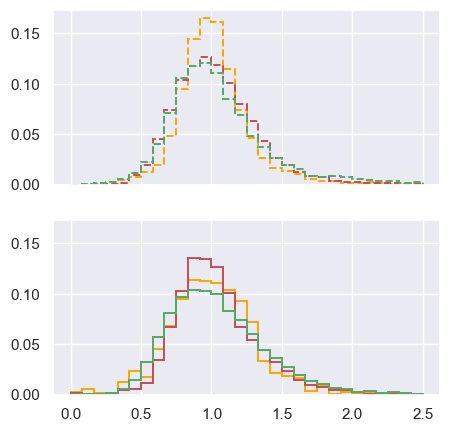

In [110]:
fig, axes=plt.subplots(2,1, figsize=(5,5), sharex=True, sharey=True)
axes[0].hist([v/np.median(v) for v in volumes['SC 0411']], color=['g','r','orange'], linestyle='--', histtype='step', range=(0,2.5), bins=30, weights=[np.ones_like(v)/len(v) for v in volumes['SC 0411']], linewidth=1.4)
axes[1].hist([v/np.median(v) for v in volumes['ME 0412']], color=['g','r','orange'], histtype='step', range=(0,2.5), bins=30, weights=[np.ones_like(v)/len(v) for v in volumes['ME 0412']], linewidth=1.4)


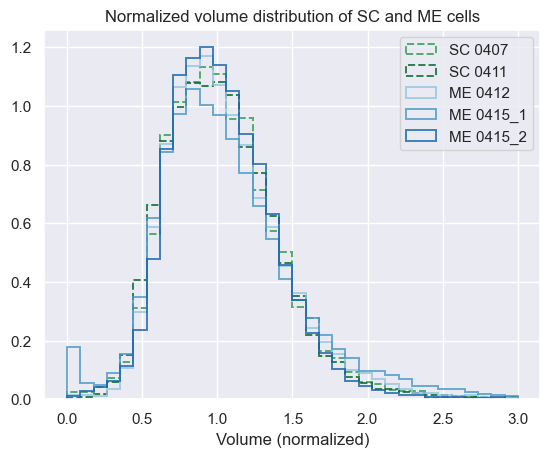

In [111]:
for label, color in zip(['SC 0407', 'SC 0411', 'ME 0412', 'ME 0415_1', 'ME 0415_2'], colors):
    if label.startswith('SC'):
        linestyle='--'
    else:
        linestyle='-'

    plt.hist(np.concatenate(volumes[label])/np.median(np.concatenate(volumes[label])), 
             bins=34, range=(0,3), density=True, histtype='step', alpha=0.8,
             linestyle=linestyle, label=label, linewidth=1.4, color=color)

plt.xlabel('Volume (normalized)')
plt.title('Normalized volume distribution of SC and ME cells')
plt.legend()

#plt.savefig('plots/volume_summary/volume_hist-all_normalized.jpg', dpi=300, bbox_inches='tight')

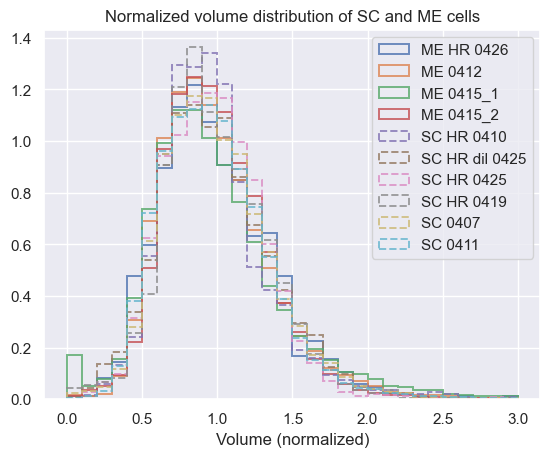

In [101]:
for label in volumes.keys():
    if label.endswith('adhered'):
        continue
    if label.startswith('SC'):
        linestyle='--'
    else:
        linestyle='-'

    plt.hist(np.concatenate(volumes[label])/np.mean(np.concatenate(volumes[label])), 
             bins=30, range=(0,3), density=True, histtype='step', alpha=0.8,
             linestyle=linestyle, label=label, linewidth=1.4)

plt.xlabel('Volume (normalized)')
plt.title('Normalized volume distribution of SC and ME cells')
plt.legend()

#plt.savefig('plots/volume_summary/volume_hist-all_normalized.jpg', dpi=300, bbox_inches='tight')

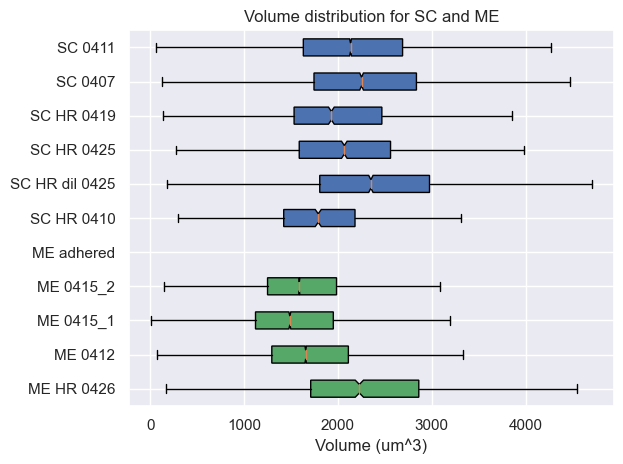

In [339]:
volume_boxplot(volumes, volumes.keys())
plt.title('Volume distribution for SC and ME')

plt.tight_layout()
plt.savefig('plots/volume_summary/volume_boxplot.jpg', dpi=300, bbox_inches='tight')

No WT labels found in the list


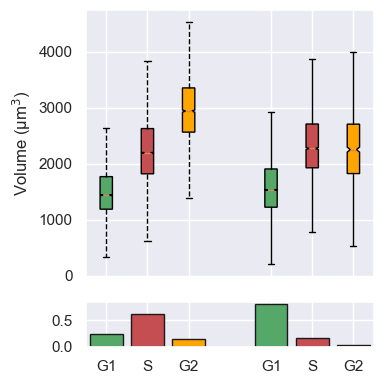

In [86]:
fig, axes=plt.subplots(2,1,figsize=(4,4), sharex=True, gridspec_kw={'height_ratios':[6,1]})
labels=['SC 0411', 'ME 0412']

#axes[0].set_title('SC treatments', weight='bold')
bp=cc_boxplot(volumes, ax=axes[0], WT_line=True, labels=labels, label_n=False, label_trials=False)
occupancy_barplot(volumes, labels, ax=axes[1], xticks='cycle')

plt.setp(bp[0]['whiskers'], linestyle='--')
fig.tight_layout()
plt.savefig(r'plots\lab_meetings\24-6-21/volume_boxplot_by_cycle-SC treatments.jpg', dpi=300, bbox_inches='tight')

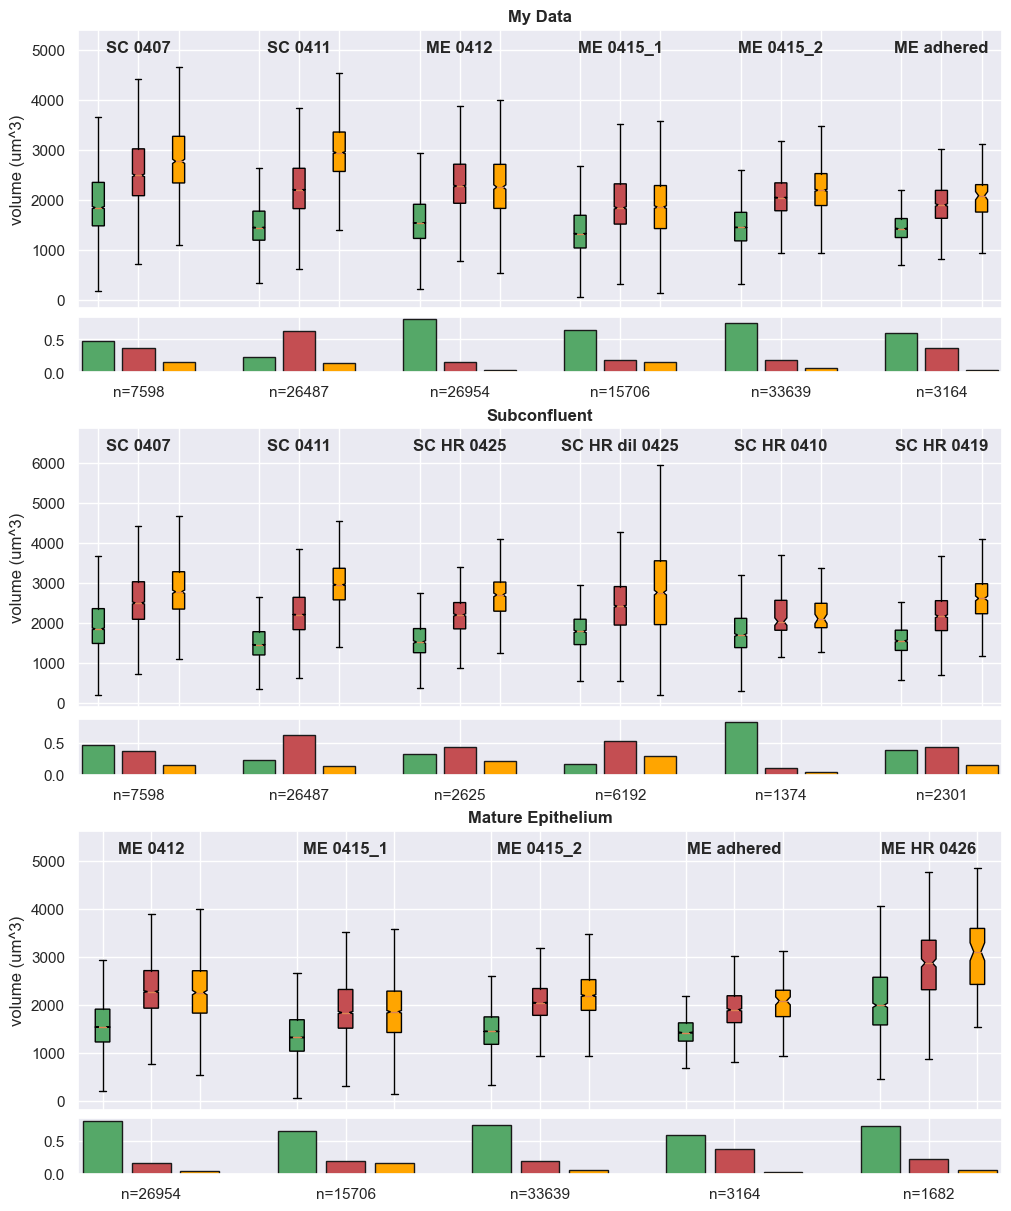

In [345]:
fig, axes=plt.subplots(6,1,figsize=(10,12), gridspec_kw={'height_ratios':[5,1,5,1,5,1]}, constrained_layout=True)

axes[0].set_title('My Data', weight='bold')
my_labels=['SC 0407', 'SC 0411', 'ME 0412', 'ME 0415_1', 'ME 0415_2', 'ME adhered']
cc_boxplot(volumes, my_labels, ax=axes[0], label_n=False)
occupancy_barplot(volumes, my_labels, ax=axes[1])
axes[1].set_xlim(axes[0].get_xlim())

SC_labels=['SC 0407', 'SC 0411', 'SC HR 0425', 'SC HR dil 0425', 'SC HR 0410', 'SC HR 0419']
cc_boxplot(volumes, SC_labels, ax=axes[2], label_n=False)
axes[2].set_title('Subconfluent', weight='bold')
occupancy_barplot(volumes, SC_labels, ax=axes[3])
axes[3].set_xlim(axes[2].get_xlim())

ME_labels=['ME 0412', 'ME 0415_1', 'ME 0415_2', 'ME adhered', 'ME HR 0426']
cc_boxplot(volumes, ME_labels, ax=axes[4], label_n=False)
axes[4].set_title('Mature Epithelium', weight='bold')
occupancy_barplot(volumes, ME_labels, ax=axes[5])
axes[5].set_xlim(axes[4].get_xlim())

plt.savefig('plots/volume_summary/volume_boxplot_by_cycle.jpg', dpi=300, bbox_inches='tight')

# Treatments

In [185]:
volume_folder='RAM_dump/volumes/'
t0419='20240419 SC treatments/'
t0425='20240425 SC treatments and ycomp bum dilutions/'
t0426='20240426 ME treatments/'
files={'SC bum 0419':t0419+'bum.pkl',
       'SC PND 0419':t0419+'PND.pkl',
       'SC rap 0419':t0419+'rapamycin.pkl',
       'SC sch77 0419':t0419+'sch77.pkl',
       'SC ycomp 0419':t0419+'ycomp.pkl',
       'SC WT 0419':t0419+'WT.pkl',
       'SC bum 0425':t0425+'bum10um.pkl',
       'SC bum33 0425':t0425+'bum33um.pkl',
       'SC 2fbs 0425':t0425+'low_serum.pkl',
       'SC rap 0425':t0425+'rapamycin.pkl',
       'SC WT dil 0425':t0425+'WT_dilution.pkl',
       'SC WT 0425':t0425+'WT.pkl',
       'SC ycomp 0425':t0425+'ycomp10um.pkl',
       'SC ycomp33 0425':t0425+'ycomp33um.pkl',
       'ME ouabain 0426':t0426+'ouabain.pkl',
       'ME phen 0426':t0426+'phenformin.pkl',
       'ME PND 0426':t0426+'pnd.pkl',
       'ME sch77 0426':t0426+'sch777.pkl',
       'ME xmu 0426':t0426+'xmu.pkl',
       'ME WT 0426':t0426+'WT.pkl'
       }

treated_volumes={file:pd.read_pickle(volume_folder+files[file])[1:] for file in files}

In [194]:
sorted_indices=np.argsort([np.median(np.concatenate(v)) for v in treated_volumes.values()])
sorted_labels=np.array(list(treated_volumes.keys()))[sorted_indices]

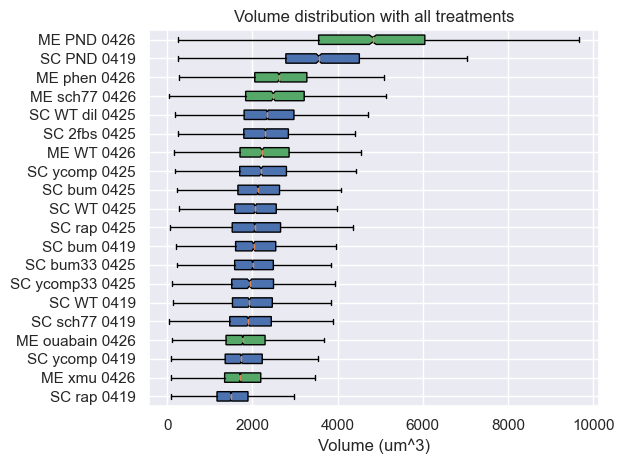

In [209]:
volume_boxplot(treated_volumes, sorted_labels)
plt.title('Volume distribution with all treatments')

plt.tight_layout()
plt.savefig('plots/volume_summary/volume_boxplot-treatments.jpg', dpi=300, bbox_inches='tight')

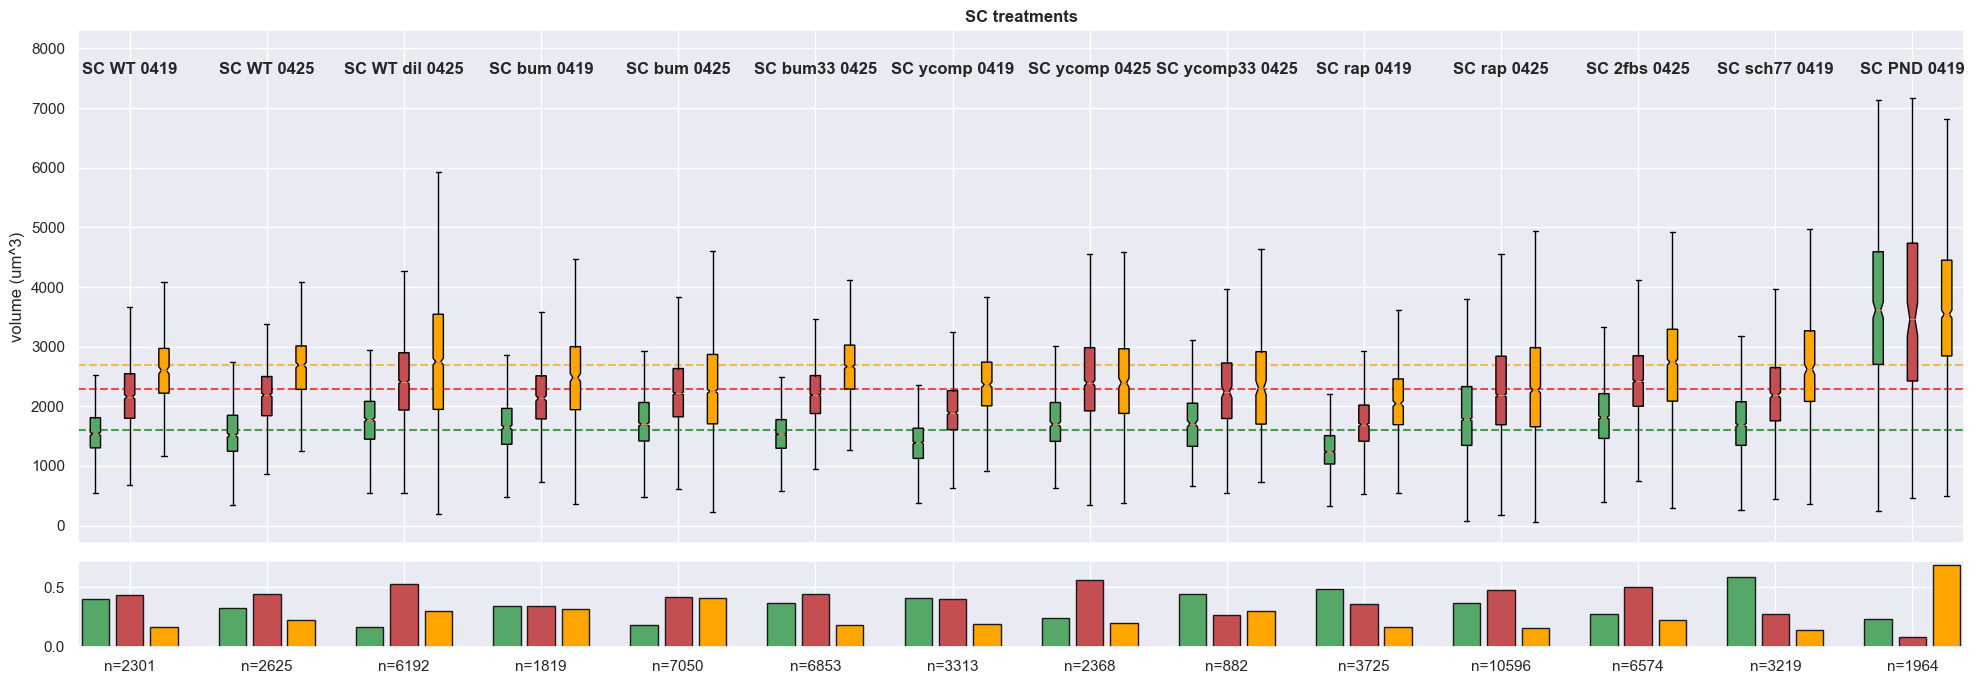

In [346]:
fig, axes=plt.subplots(2,1,figsize=(20,7), sharex=True, gridspec_kw={'height_ratios':[6,1]})
SC_labels=['SC WT 0419', 'SC WT 0425', 'SC WT dil 0425', 'SC bum 0419', 'SC bum 0425', 'SC bum33 0425', 'SC ycomp 0419', 'SC ycomp 0425', 'SC ycomp33 0425', 'SC rap 0419', 'SC rap 0425', 'SC 2fbs 0425', 'SC sch77 0419', 'SC PND 0419']

axes[0].set_title('SC treatments', weight='bold')
cc_boxplot(treated_volumes, ax=axes[0], WT_line=True, labels=SC_labels, label_n=False)
occupancy_barplot(treated_volumes, SC_labels, ax=axes[1])

fig.tight_layout()
plt.savefig('plots/volume_summary/volume_boxplot_by_cycle-SC treatments.jpg', dpi=300, bbox_inches='tight')

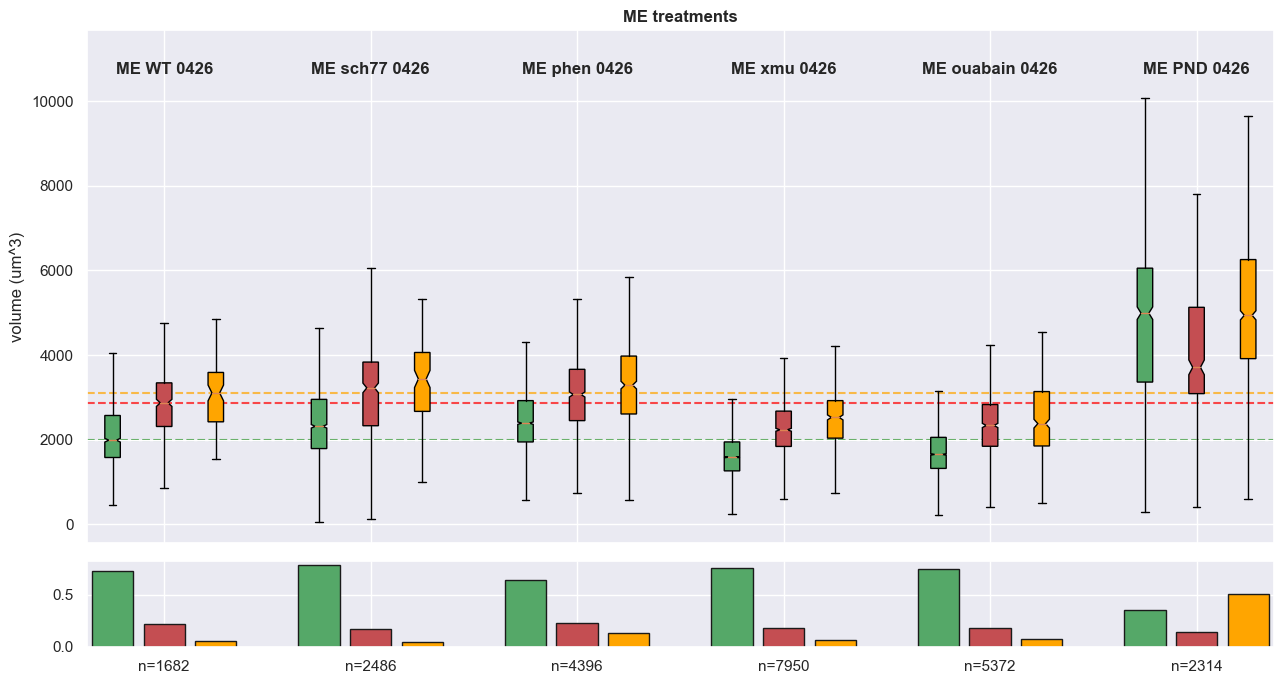

In [347]:
fig, axes=plt.subplots(2,1,figsize=(13,7), sharex=True, gridspec_kw={'height_ratios':[6,1]})
ME_labels=['ME WT 0426', 'ME sch77 0426', 'ME phen 0426', 'ME xmu 0426', 'ME ouabain 0426', 'ME PND 0426']
cc_boxplot(treated_volumes, WT_line=True, ax=axes[0], labels=ME_labels)
axes[0].set_title('ME treatments', weight='bold')
occupancy_barplot(treated_volumes, ME_labels, ax=axes[1])

fig.tight_layout()
plt.savefig('plots/volume_summary/volume_boxplot_by_cycle-ME treatments.jpg', dpi=300, bbox_inches='tight')